<a href="https://colab.research.google.com/github/bulent-1111/Deep_Learning/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("TPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
X_train[2].shape

(28, 28)

In [8]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

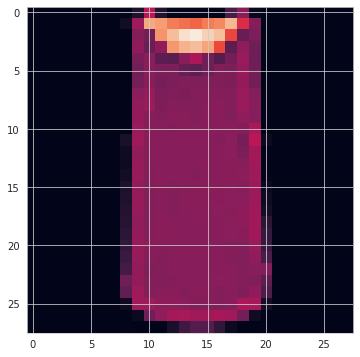

In [9]:
plt.imshow(X_train[2])

In [10]:
y_train[2]

0

In [11]:
y_train.shape

(60000,)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
y_train[0]

9

In [16]:
classes[y_train[0]]

'Ankle boot'

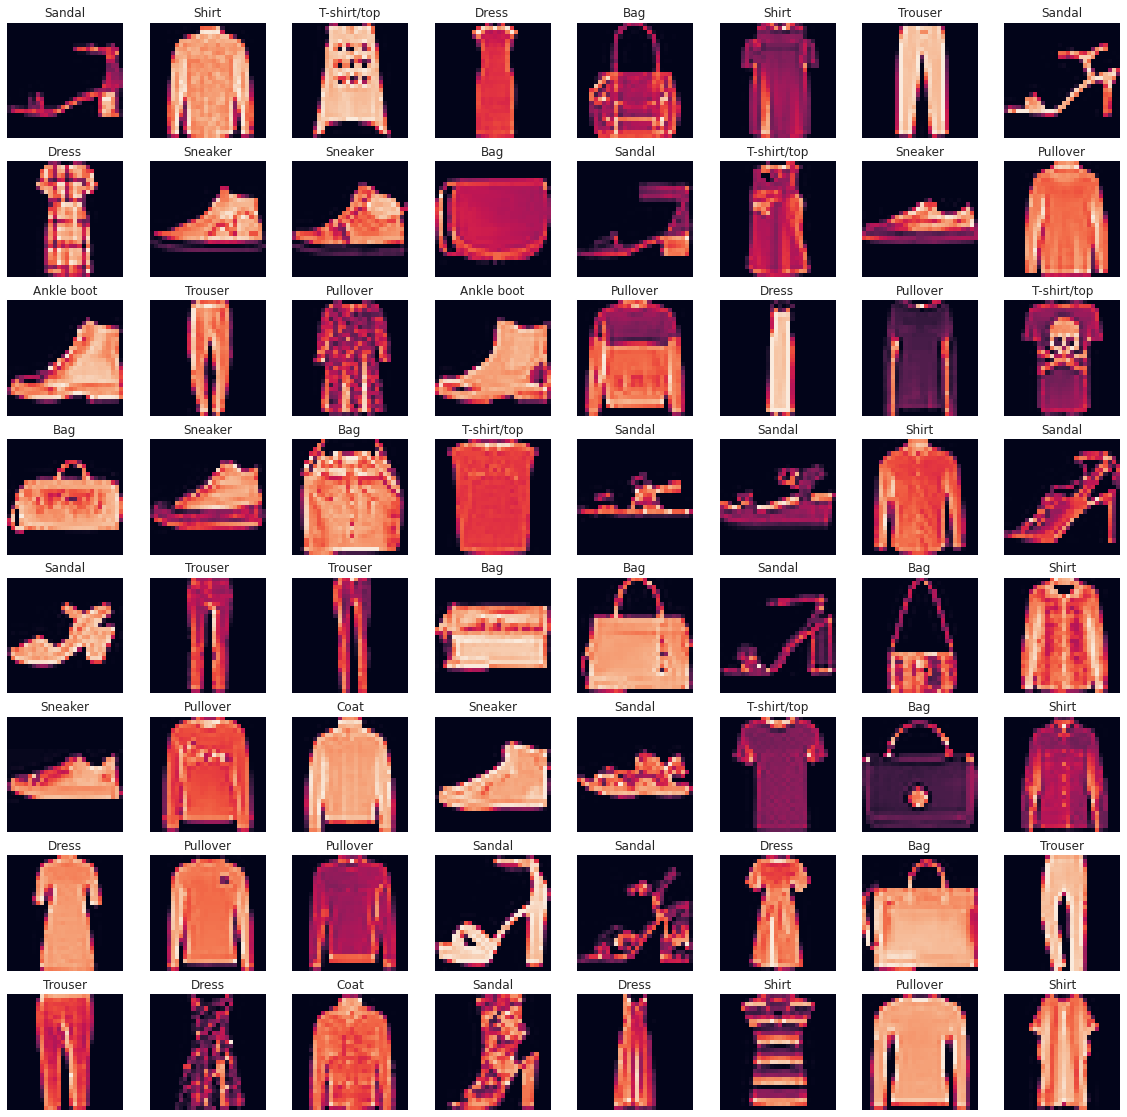

In [17]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
X_train[2].min()

0

In [19]:
X_train[2].max()

255

In [20]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
X_train[2].min()

0.0

In [22]:
X_train[2].max()

1.0

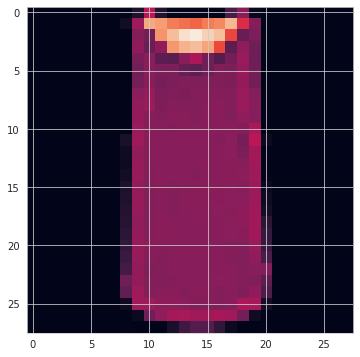

In [23]:
plt.imshow(X_train[2])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [27]:
y_train= y_train.reshape(y_train.shape[0], 1) 
y_test= y_test.reshape(y_test.shape[0], 1) 

In [28]:
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [29]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [32]:
Y_train[2] 

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [34]:
X_train.shape

(60000, 28, 28, 1)

In [35]:
X_test.shape

(10000, 28, 28, 1)

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [37]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
#loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 448s 237ms/step - loss: 0.6284 - accuracy: 0.7826 - val_loss: 0.4175 - val_accuracy: 0.8516
Epoch 2/50
1875/1875 [==============================] - 451s 241ms/step - loss: 0.3741 - accuracy: 0.8737 - val_loss: 0.2810 - val_accuracy: 0.9049
Epoch 3/50
1875/1875 [==============================] - 445s 238ms/step - loss: 0.3278 - accuracy: 0.8911 - val_loss: 0.2999 - val_accuracy: 0.8923
Epoch 4/50
1875/1875 [==============================] - 449s 240ms/step - loss: 0.3068 - accuracy: 0.8969 - val_loss: 0.2866 - val_accuracy: 0.9027
Epoch 5/50
1875/1875 [==============================] - 446s 238ms/step - loss: 0.2899 - accuracy: 0.9047 - val_loss: 0.2583 - val_accuracy: 0.9091
Epoch 6/50
1875/1875 [==============================] - 448s 239ms/step - loss: 0.2745 - accuracy: 0.9090 - val_loss: 0.2305 - val_accuracy: 0.9183
Epoch 7/50
1875/1875 [==============================] - 447s 238ms/step - loss: 0.2637 - accuracy: 0.9121 - val_

**TASK 7: Plot values of metrics you used in your model.**

In [41]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.628,0.783,0.418,0.852
1,0.374,0.874,0.281,0.905
2,0.328,0.891,0.300,0.892
3,0.307,0.897,0.287,0.903
4,0.290,0.905,0.258,0.909
5,0.274,0.909,0.230,0.918
6,0.264,0.912,0.225,0.923
7,0.257,0.915,0.228,0.922
8,0.246,0.918,0.231,0.924
9,0.242,0.921,0.217,0.926


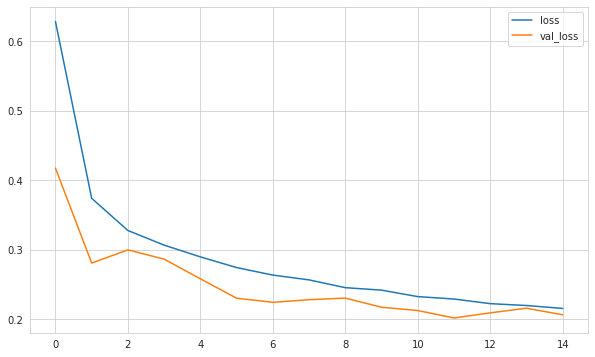

In [42]:
summary[["loss", "val_loss"]].plot();

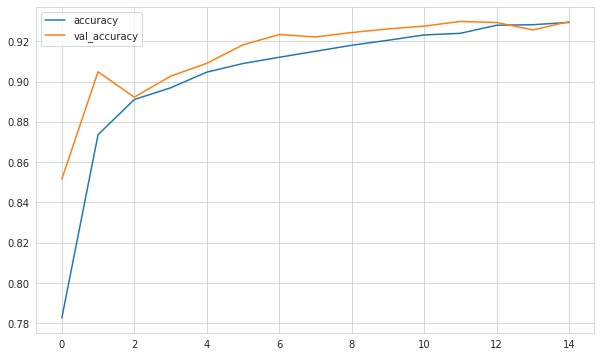

In [43]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [45]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 18s 57ms/step - loss: 0.2020 - accuracy: 0.9299


[0.20200170576572418, 0.9298999905586243]

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20200170576572418
Test accuracy: 0.9298999905586243


In [48]:
pred_prob = model.predict(X_test)

In [49]:
y_pred = np.argmax(pred_prob, axis=1)

In [50]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.93      0.88      0.90      1000
           3       0.92      0.94      0.93      1000
           4       0.87      0.92      0.89      1000
           5       0.99      0.99      0.99      1000
           6       0.77      0.79      0.78      1000
           7       0.97      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [54]:
print(confusion_matrix(y_test, y_pred))

[[856   1  11  14   4   1 111   0   2   0]
 [  1 991   0   7   0   0   0   0   1   0]
 [  8   1 878   9  43   0  60   0   1   0]
 [  4   4   5 941  29   0  17   0   0   0]
 [  1   1  15  17 918   0  48   0   0   0]
 [  0   0   0   0   0 986   0   7   0   7]
 [ 75   2  32  31  65   0 790   0   5   0]
 [  0   0   0   0   0   6   0 980   0  14]
 [  1   1   1   3   1   1   1   0 991   0]
 [  0   0   0   0   0   4   0  27   1 968]]


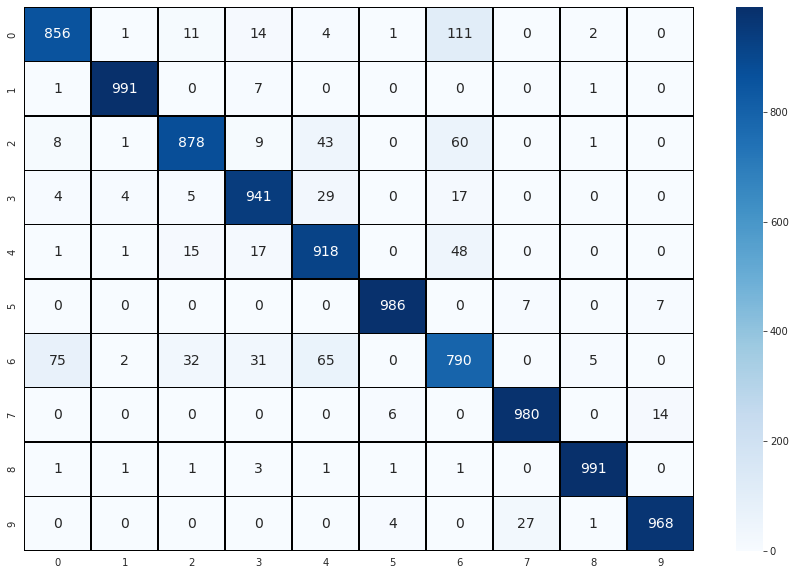

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14});

## Prediction

In [57]:
my_image = X_test[2]

In [58]:
my_image.shape

(28, 28, 1)

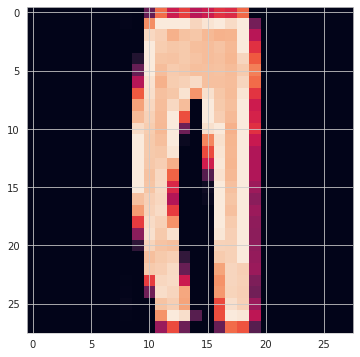

In [62]:
plt.imshow(my_image.reshape(28,28));

In [65]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [66]:
image_prediction

array([[1.4592620e-09, 1.0000000e+00, 2.5027882e-09, 2.5163498e-08,
        4.3949098e-09, 1.5553724e-08, 2.5597759e-09, 1.3847014e-09,
        9.7221342e-10, 3.7160290e-09]], dtype=float32)

In [67]:
np.argmax(image_prediction, axis=1)

array([1])

In [69]:
result=np.argmax(image_prediction, axis=1)

In [70]:
classes[int(result)]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___